## 다변수 이산확률변수
- 카테고리 값을 가질 수 있는 이산확률변수가 두 개 이상 있는 경우에는
- 각 확률변수에 대한 확률분포와 더불어 확률분포쌍이 가지는 확률분포를 살펴봐야 한다.

##### 1. Joint pmf
- 각 확률변수의 단일사건을 하나의 숫자쌍으로 나타낸 atom사건에 대한 확률분포
- 하나 하나의 숫자쌍에 대한 확률을 알려주는 pmf만 있다면 전체 확률분포를 알 수 있다.

In [1]:
# example : 대학교 X,Y과목에 대한 시험결과를 A, B, C, D, E, F 일때의 pmf

In [3]:
# X, Y 모두 A를 받은 사람이 좌측 상단의 1명
pmf = np.array([[1, 2, 1, 0, 0, 0],
                [0, 2, 3, 1, 0, 0],
                [0, 4, 7, 4, 1, 0],
                [0, 1, 4, 5, 4, 0],
                [0, 0, 1, 3, 2, 0],
                [0, 0, 0, 1, 2, 1]])

In [4]:
pmf = pmf/pmf.sum()
pmf

array([[0.02, 0.04, 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.04, 0.06, 0.02, 0.  , 0.  ],
       [0.  , 0.08, 0.14, 0.08, 0.02, 0.  ],
       [0.  , 0.02, 0.08, 0.1 , 0.08, 0.  ],
       [0.  , 0.  , 0.02, 0.06, 0.04, 0.  ],
       [0.  , 0.  , 0.  , 0.02, 0.04, 0.02]])

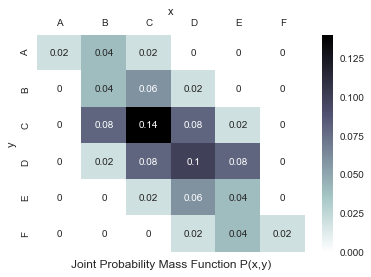

In [5]:
# 이산확률변수 2개이기 때문에 heat맵으로 먼저 표현해본다.
ax = sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True,
                 xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
                 yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability Mass Function P(x,y)", y=-0.1)
plt.show()

- 이 확률변수의 표본 값이 (D,F)일 확률을 구하라. : 0.02
- 이 확률변수의 표본 값이 (F,A)일 확률을 구하라. : 0
- 확률 변수의 값을 모른다고 할 때 어떤 값이 나올 가능성이 가장 높은가. : 두 과목 모두 C

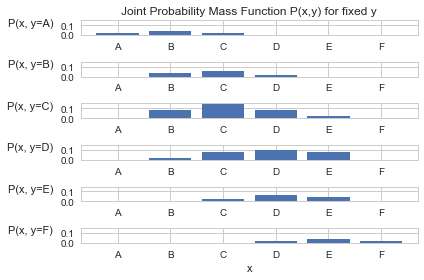

In [6]:
# Y값을 각각의 학점으로 고정하였을 때, pmf의 단면을 표현해보자
x = np.arange(6)
plt.subplot(611); plt.bar(x, pmf[0, :]); plt.ylabel("P(x, y=A)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Joint Probability Mass Function P(x,y) for fixed y")
plt.subplot(612); plt.bar(x, pmf[1, :]); plt.ylabel("P(x, y=B)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(613); plt.bar(x, pmf[2, :]); plt.ylabel("P(x, y=C)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(614); plt.bar(x, pmf[3, :]); plt.ylabel("P(x, y=D)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(615); plt.bar(x, pmf[4, :]); plt.ylabel("P(x, y=E)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.subplot(616); plt.bar(x, pmf[5, :]); plt.ylabel("P(x, y=F)", rotation=0, labelpad=30); plt.ylim(0, 0.15)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.xlabel("x")
plt.tight_layout()
plt.show()

- 만약 확률 변수  Y 의 값이 A가 나왔다면 확률 변수  X 의 값은 어떤 값이 나올 가능성이 가장 높은가. : B
- 만약 확률 변수  Y 의 값이 C가 나왔다면 확률 변수  X 의 값은 어떤 값이 나올 가능성이 가장 높은가. : C

##### 2. Marginal pmf
- 두 확률변수 중 하나의 확률변수 값에 대해서만 확률분포를 표시한 함수
- 즉 단변수 pmf를 말한다.

In [7]:
# 그래프에서 볼때 위에서 아래쪽으로 쭉 더해주는 형태(axis=0)
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x

array([0.02, 0.18, 0.32, 0.28, 0.18, 0.02])

In [10]:
# 그래프에서 볼때 왼쪽에서 오른쪽으로 쭉 더해주는 형태(axis=1)
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([[0.08],
       [0.12],
       [0.32],
       [0.28],
       [0.12],
       [0.08]])

- 확률변수 Y 의 표본 값이 A일 확률을 구하라. : 0.08 
- 확률변수 X 의 표본 값이 B일 확률을 구하라. : 0.18

##### 3. Conditional pmf
- 다변수 확률변수 중에서 하나가 특정값으로 고정되어버린 경우, 나머지 변수들의 pmf를 말한다.
- point는 scaling !!

In [13]:
# Y과목이 A일때 X과목의 조건부확률 : scaling
cond_y0 = pmf[0, :]/pmf_marginal_y[0]
cond_y0, cond_y0.sum()

(array([0.25, 0.5 , 0.25, 0.  , 0.  , 0.  ]), 1.0)

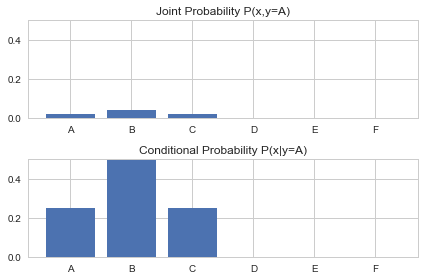

In [15]:
# Y과목이 A일때 X과목의 조건부확률 : scaling in graph
plt.subplot(211); plt.bar(x, pmf[0, :]); plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Joint Probability P(x,y=A)")
plt.subplot(212); plt.bar(x, cond_y0); plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Conditional Probability P(x|y=A)")
plt.tight_layout()
plt.show()

In [16]:
# Y과목이 B일때 X과목의 조건부확률 : scaling
cond_y1 = pmf[1, :]/pmf_marginal_y[1]
cond_y1, cond_y1.sum()

(array([0.        , 0.33333333, 0.5       , 0.16666667, 0.        ,
        0.        ]), 0.9999999999999999)

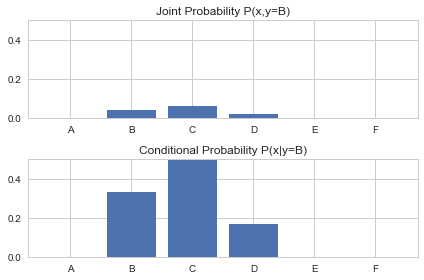

In [17]:
# Y과목이 B일때 X과목의 조건부확률 : scaling in graph
y = np.arange(6)
plt.subplot(211); plt.bar(y, pmf[1, :]); plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Joint Probability P(x,y=B)")
plt.subplot(212); plt.bar(y, cond_y1); plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title("Conditional Probability P(x|y=B)")
plt.tight_layout()
plt.show()